In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df = pd.read_csv("../input/grunge-bands-dataset/grunge.csv")

In [3]:
print(f'Dataframe rows: {df.shape[0]}')
print(f'Dataframe columns: {df.shape[1]}')

Dataframe rows: 707
Dataframe columns: 97


# Who the Tracks Belong to?

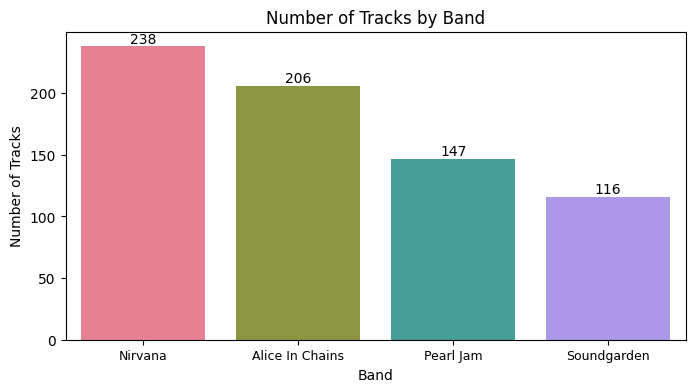

In [4]:
plt.figure(figsize=(8,4))
ax = sns.countplot(
    data=df,
    x='artists',
    palette=sns.color_palette("husl", 4),
)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.xlabel("Band")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks by Band")

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

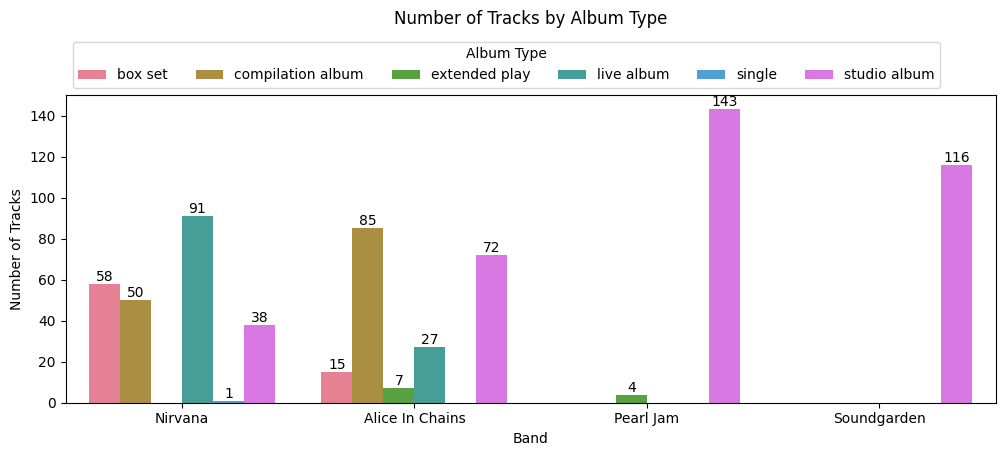

In [5]:
plt.figure(figsize=(12,4))
ax = sns.barplot(
    data=df.groupby('album_type')['artists'].value_counts().reset_index(),
    x='artists',
    y='count',
    hue='album_type',
    palette=sns.color_palette("husl", 6),
    linewidth=0
)
plt.xlabel("Band")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks by Album Type\n\n\n ")
plt.legend(title="Album Type", loc="lower left", ncols=6, bbox_to_anchor=(0, 1))

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# Audio Features - What Do the Tracks Sound Like?

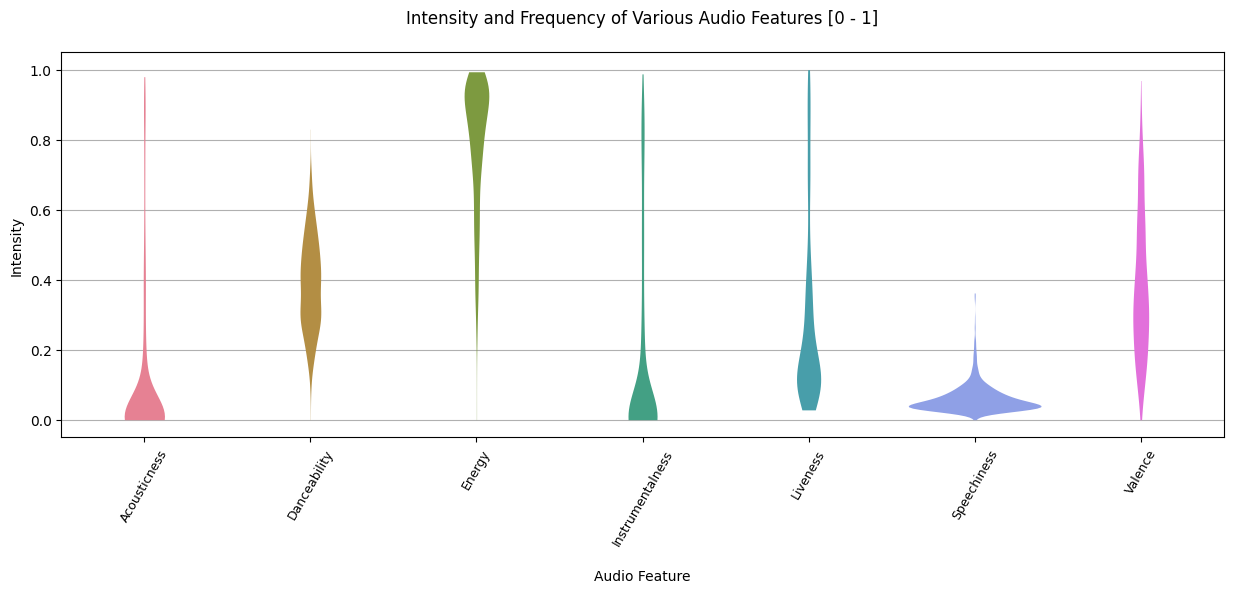

In [6]:
plt.figure(figsize=(15,5))
ax = sns.violinplot(
    # audio features on scale [0 - 1]
    data=df[['acousticness','danceability','energy', 'instrumentalness','liveness','speechiness', 'valence']],
    palette=sns.color_palette("husl", 7),
    linewidth=0,
    cut=0,
    inner_kws=dict(box_width=5, color="0.4")
)
plt.xlabel("\nAudio Feature")
plt.ylabel("Intensity")
plt.title("Intensity and Frequency of Various Audio Features [0 - 1]\n")
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_xticklabels([i.get_text().title() for i in ax.get_xticklabels()], rotation=60, fontsize=9)

plt.show()

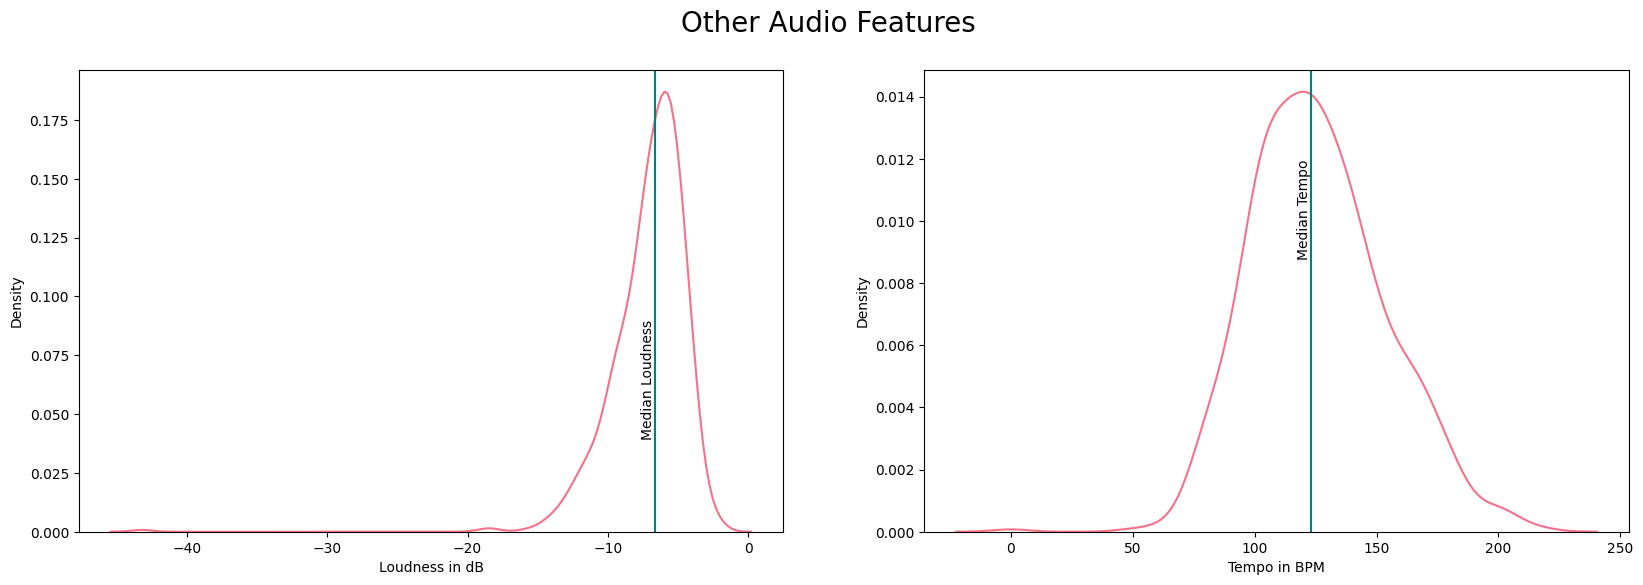

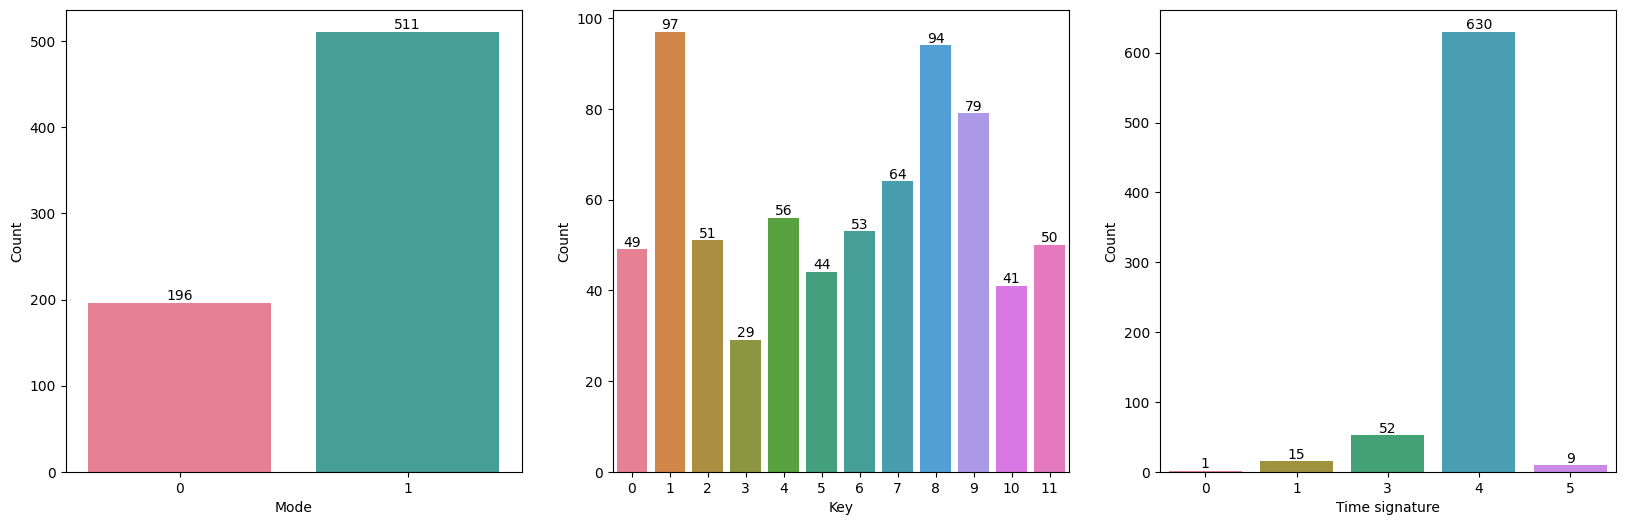

In [7]:
# features: loudness, tempo [continuous]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
fig.suptitle('Other Audio Features', fontsize=20)

ax1 = sns.kdeplot(
    data=df.loudness,
    ax=axes[0],
    color=sns.color_palette("husl", 1)[0]
)
ax1.set_xlabel("Loudness in dB")
axes[0].axvline(x=df.loudness.median(), color='teal')
axes[0].text(x=df.loudness.median(), y=0.09, s='Median Loudness', ha='right', va='top', rotation=90)

ax2 = sns.kdeplot(
    data=df.tempo,
    ax=axes[1],
    color=sns.color_palette("husl", 1)[0]
)
ax2.set_xlabel("Tempo in BPM")
axes[1].axvline(x=df.tempo.median(), color='teal', label='mean')
axes[1].text(x=df.tempo.median(), y=0.012, s='Median Tempo', ha='right', va='top', rotation=90)


# features: mode, key, time_signature [discrete]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

ax1 = sns.countplot(
    data=df,
    x='mode',
    palette=sns.color_palette("husl", 2),
    # stat='proportion',
    ax=axes[0]
)
ax1.set_xlabel("Mode")
ax1.set_ylabel("Count")

for i in ax1.containers:
    ax1.bar_label(i,)

ax2 = sns.countplot(
    data=df,
    x='key',
    ax=axes[1],
    palette=sns.color_palette("husl", 12),
)
ax2.set_xlabel("Key")
ax2.set_ylabel("Count")

for i in ax2.containers:
    ax2.bar_label(i,)

ax3 = sns.countplot(
    data=df,
    x='time_signature',
    ax=axes[2],
    palette=sns.color_palette("husl", 5),

)
ax3.set_xlabel("Time signature")
ax3.set_ylabel("Count")

for i in ax3.containers:
    ax3.bar_label(i,)

plt.show()

# Album Rating

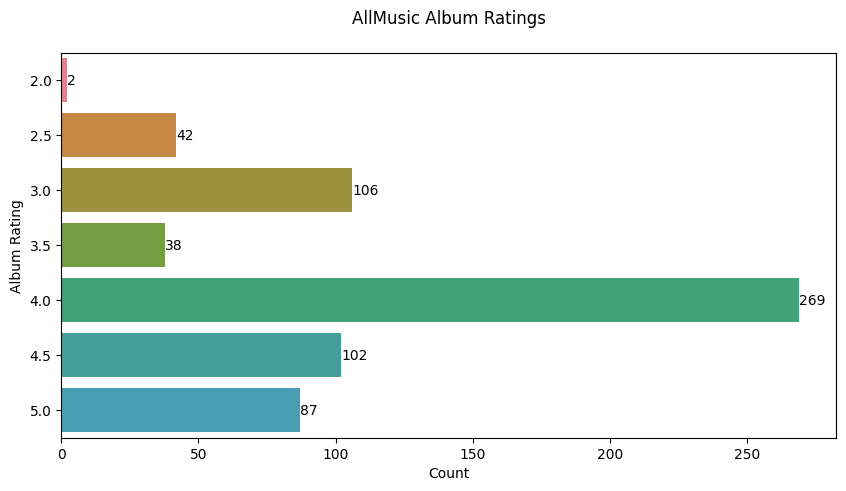

In [8]:
plt.figure(figsize=(10,5))

ax = sns.countplot(
    data=df,
    y='album_rating',
    palette=sns.color_palette("husl", 10)
)

ax.set_xlabel("Count")
ax.set_ylabel("Album Rating")
plt.title("AllMusic Album Ratings\n")

for i in ax.containers:
    ax.bar_label(i,fontsize=10)


# NA Values

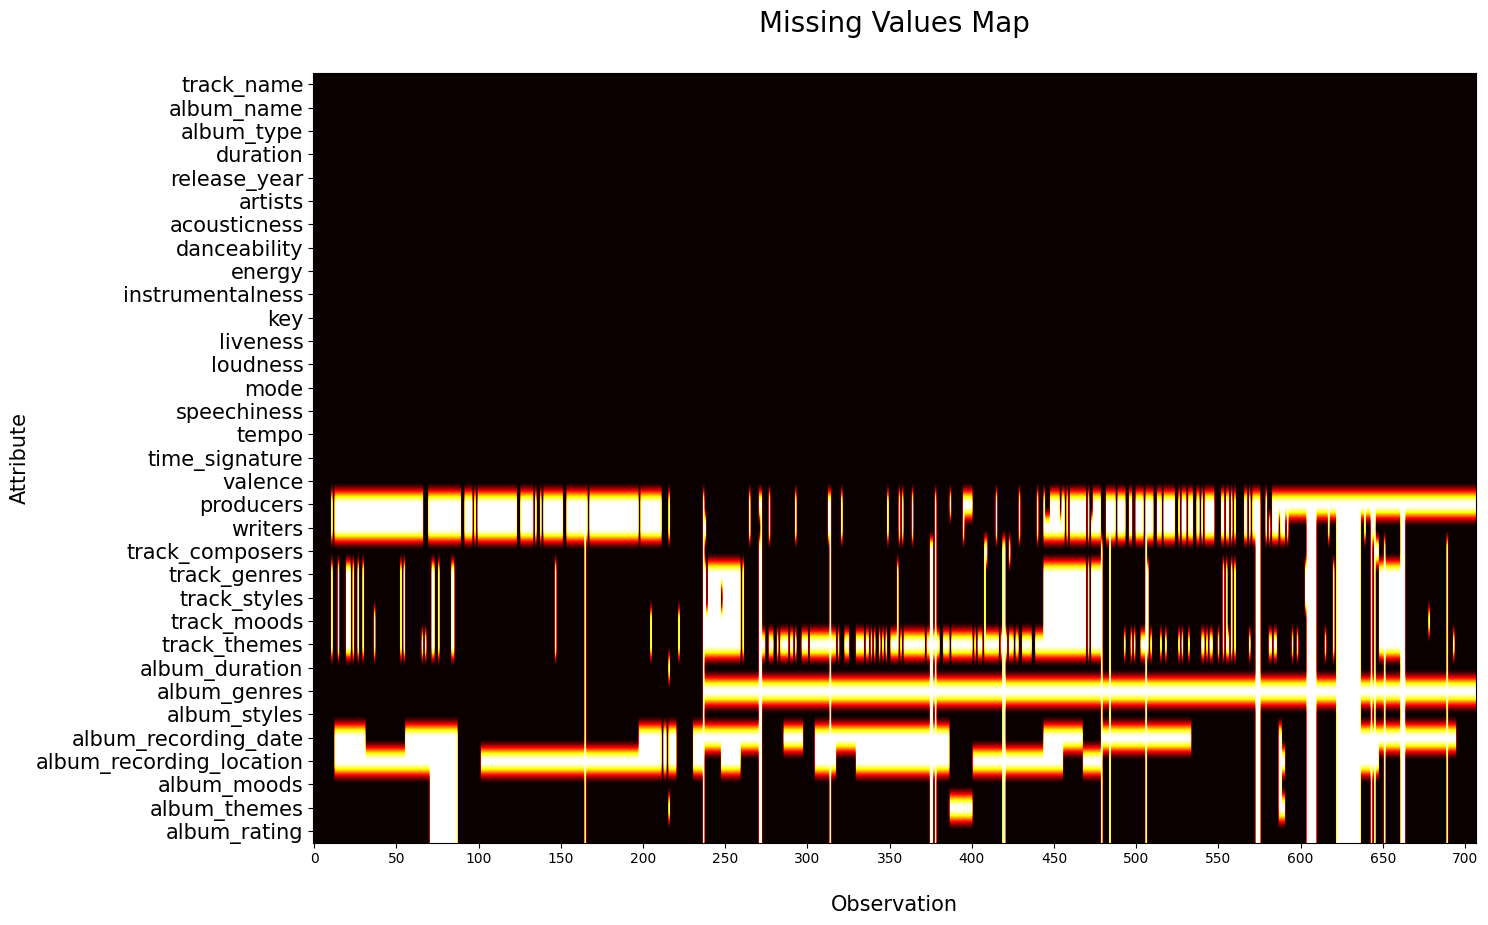

In [9]:
fig = plt.figure(figsize=(15,10))

plt.imshow(df.isnull().iloc[:,:33].T, cmap='hot', aspect='auto')

ax = plt.gca()
ax.set_xticks(range(0,750,50))
ax.set_yticks(range(33))
ax.set_yticklabels(labels=df.columns[:33], fontsize=15)
ax.set_xlabel('\nObservation', fontsize=15)
ax.set_ylabel('Attribute', fontsize=15)
plt.title("Missing Values Map\n", fontsize=20)

plt.show()

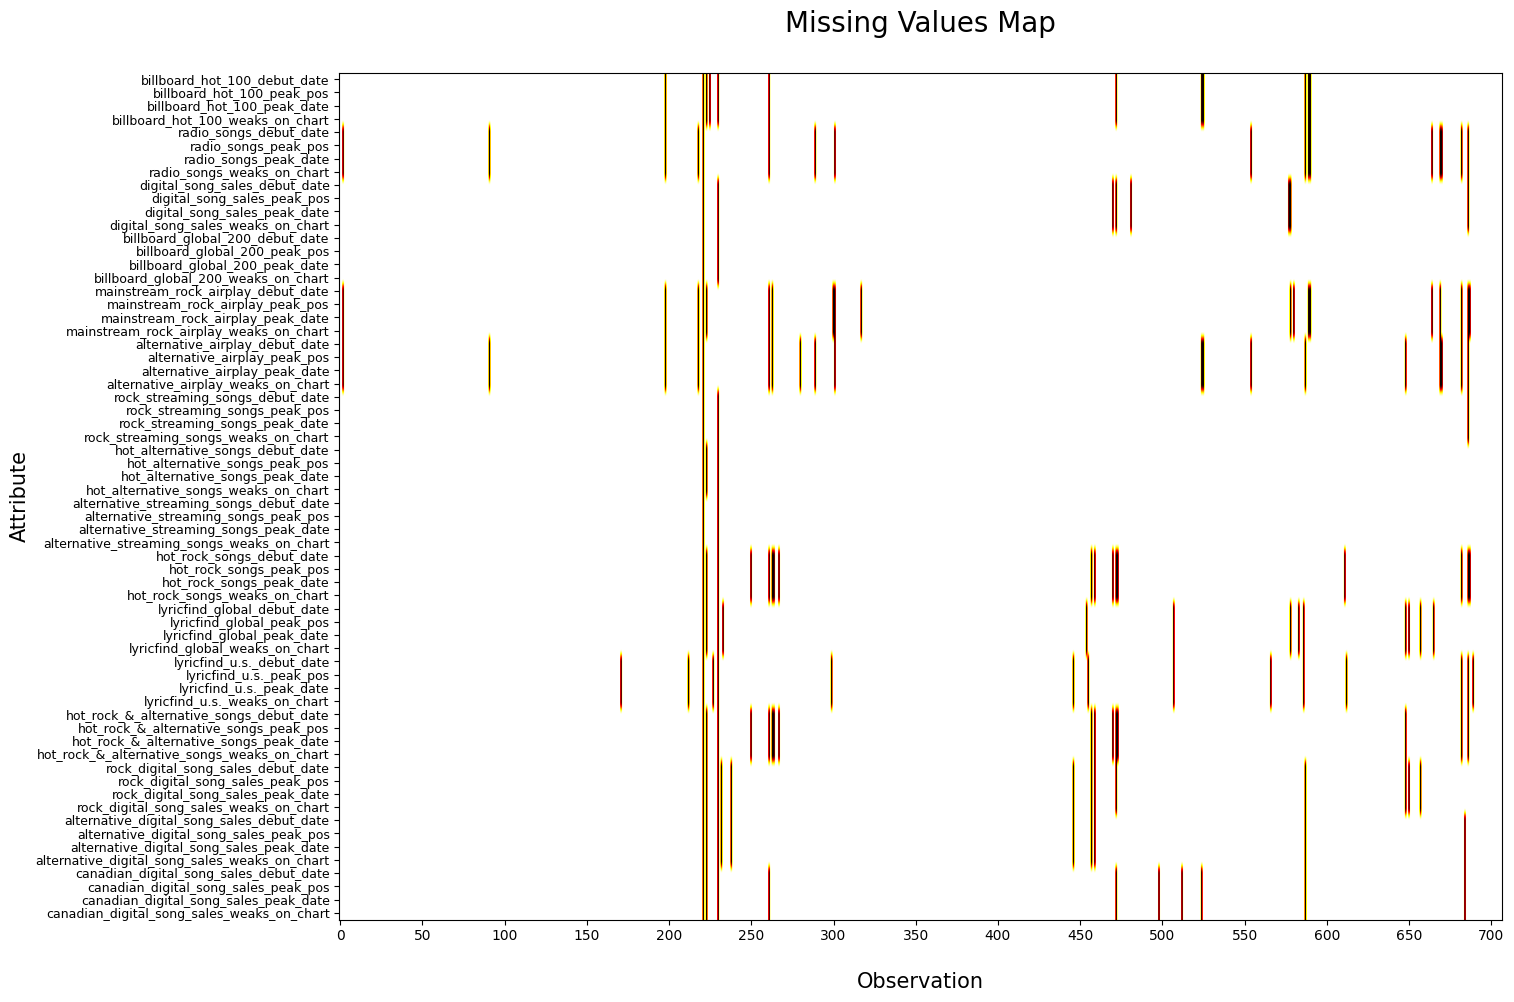

In [10]:
fig = plt.figure(figsize=(15,11))

plt.imshow(df.isnull().iloc[:,33:].T, cmap='hot', aspect='auto')

ax = plt.gca()
ax.set_xticks(range(0,750,50))
ax.set_yticks(range(0, 64))
ax.set_yticklabels(labels=df.columns[33:], fontsize=9)
ax.set_xlabel('\nObservation', fontsize=15)
ax.set_ylabel('Attribute', fontsize=15)

plt.title("Missing Values Map\n", fontsize=20)

plt.show()